In [ ]:
#### Prblm statement-->> predict the total number of confirmed cases

In [ ]:
#!pip install pystan
#!pip install fbprophet

In [1]:
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [2]:
from fbprophet import Prophet

In [3]:
### to check all the function & modules inside Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv(r'F:\Time_Series Data Analysis\Projects\Covid-19/covid_19_clean_complete.csv')

In [6]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [12]:
df.shape

(49068, 10)

In [7]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [10]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [11]:
df['Date'].nunique()

188

In [15]:
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

C:\Users\mcr\Anaconda3\envs\Timee\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [16]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [17]:
df_prophet=total.rename(columns={'Date':'ds','Confirmed':'y'})

In [18]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [19]:
m=Prophet()

In [20]:
model=m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [22]:
### ### now I am going to do forecasting so to do forecasting I need some Future Days 
future_global=model.make_future_dataframe(periods=30,freq='D')

In [23]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [25]:
df_prophet.shape

(188, 5)

In [24]:
future_global.shape

(218, 1)

In [27]:
df_prophet['ds'].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [28]:
future_global.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


In [29]:
### now do Prediction on future_global
prediction=model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.063986e+04,-1.295797e+05,7.801090e+04,-1.063986e+04,-1.063986e+04,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,0.0,0.0,0.0,-2.162230e+04
1,2020-01-23,-7.901275e+03,-1.171694e+05,9.420076e+04,-7.901275e+03,-7.901275e+03,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,0.0,0.0,0.0,-8.977945e+03
2,2020-01-24,-5.162694e+03,-9.628458e+04,1.095651e+05,-5.162694e+03,-5.162694e+03,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,0.0,0.0,0.0,4.934777e+03
3,2020-01-25,-2.424113e+03,-9.470655e+04,1.245388e+05,-2.424113e+03,-2.424113e+03,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,1.131731e+04
4,2020-01-26,3.144674e+02,-8.876908e+04,1.175127e+05,3.144674e+02,3.144674e+02,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,7.551169e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144058e+07,2.105572e+07,2.180351e+07,2.107500e+07,2.178031e+07,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,2.145432e+07
214,2020-08-23,2.164466e+07,2.125011e+07,2.202216e+07,2.126130e+07,2.201590e+07,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,2.165190e+07
215,2020-08-24,2.184875e+07,2.142019e+07,2.224519e+07,2.144111e+07,2.223832e+07,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,0.0,0.0,0.0,2.184658e+07
216,2020-08-25,2.205283e+07,2.159079e+07,2.246648e+07,2.162958e+07,2.247613e+07,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,0.0,0.0,0.0,2.203598e+07


In [30]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145432e+07,2.105572e+07,2.180351e+07
214,2020-08-23,2.165190e+07,2.125011e+07,2.202216e+07
215,2020-08-24,2.184658e+07,2.142019e+07,2.224519e+07
216,2020-08-25,2.203598e+07,2.159079e+07,2.246648e+07
217,2020-08-26,2.224593e+07,2.176395e+07,2.268203e+07


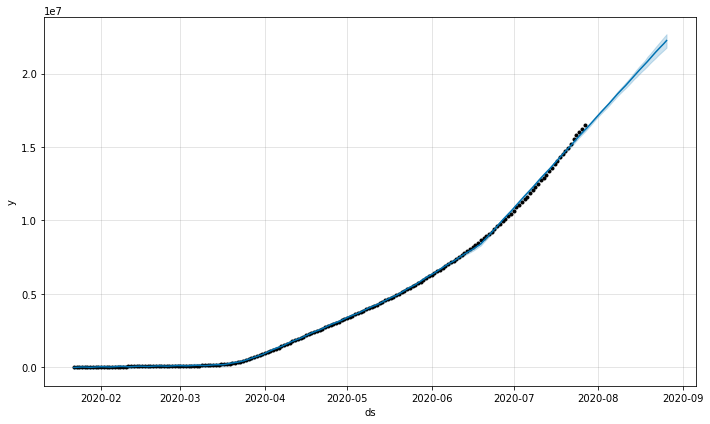

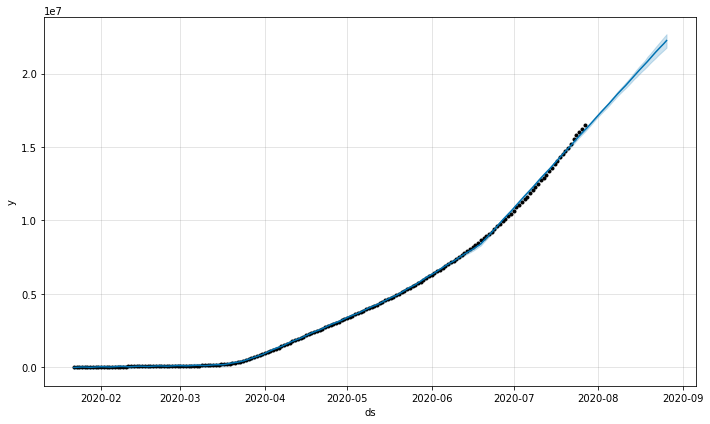

In [31]:
#### plot the predictions u will see these are with respect to yhat
model.plot(prediction)

### Conclusion--> This is what our prediction looks like. The direction of overall case numbers is probably true, u will observe how cases rises exponentially

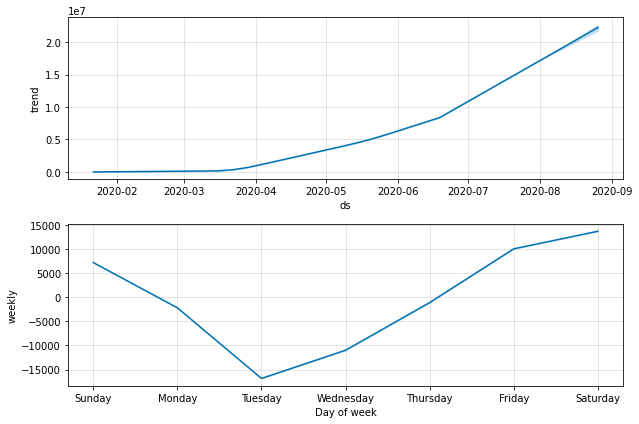

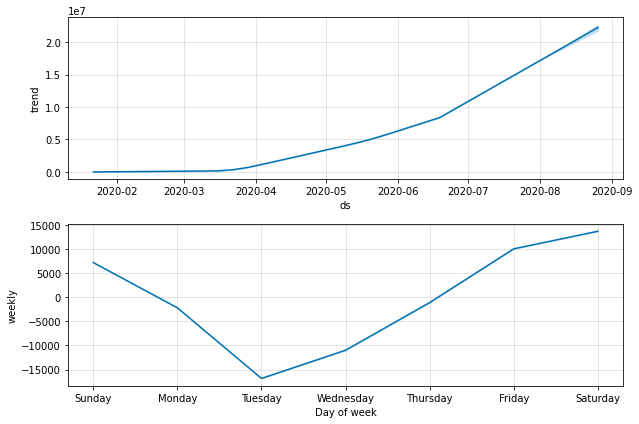

In [32]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

In [33]:
#### The prophet model identifies points at which the trend changes and those can be plotted.¶
from fbprophet.plot import add_changepoints_to_plot

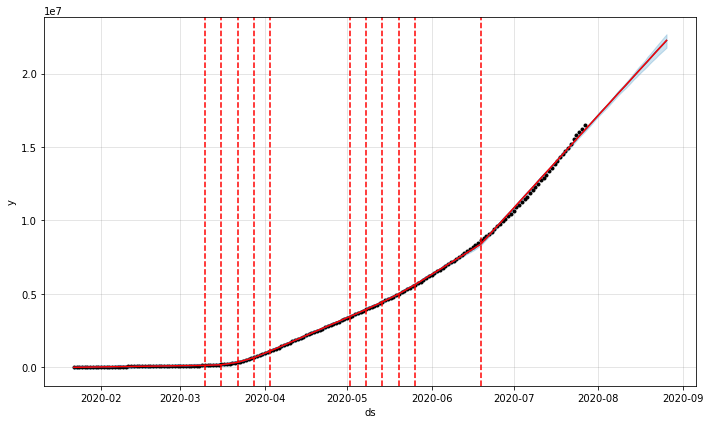

In [34]:
fig=model.plot(prediction)

a=add_changepoints_to_plot(fig.gca(),model,prediction)

In [35]:
from fbprophet.diagnostics import cross_validation

In [36]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')
## horizon='365 days'--> for how many days we have to cross validate=====

## Computes forecasts from historical cutoff points Beginning from..

## (end - horizon) it means it is going to take that date that is (end - horizon) bcz on these date we have to just 
## cross-validate for the new dataset that we have to find out

## period=180 as from documentation of func as period=0.5*365=180 or {period=1/2*horizon value}
## initial -How many total no. of days we actually want-- 3*365 from documentation of function or  {initial=3*horizon}

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


In [37]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.195981e+06,3.206269e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279516e+06,3.291390e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361907e+06,3.377886e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439527e+06,3.461847e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.514582e+06,3.546328e+06,3515244,2020-04-28


In [38]:
df_cv.shape

(150, 6)

#### Obtaining the Performance Metrics
    We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.


In [39]:
from fbprophet.diagnostics import performance_metrics

In [40]:
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.732177e+10,165292.978537,129431.475977,0.016894,0.017781,0.000000
1,4 days,3.783770e+10,194519.153621,151640.363022,0.019358,0.022609,0.000000
2,5 days,5.187132e+10,227752.759122,175493.706735,0.021809,0.025662,0.066667
3,6 days,6.958295e+10,263785.805797,202488.978430,0.024588,0.026660,0.133333
4,7 days,9.037899e+10,300630.981552,232841.149368,0.027870,0.031220,0.200000


In [41]:
from fbprophet.plot import plot_cross_validation_metric

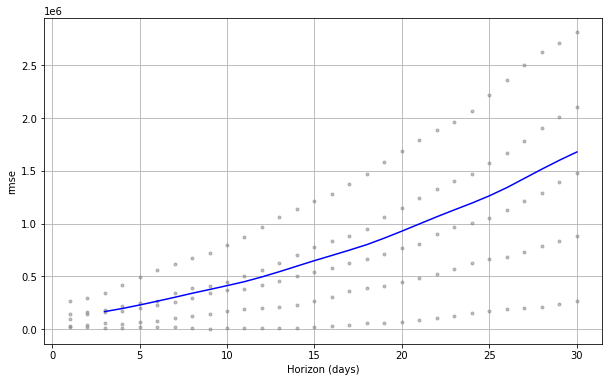

In [42]:
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')

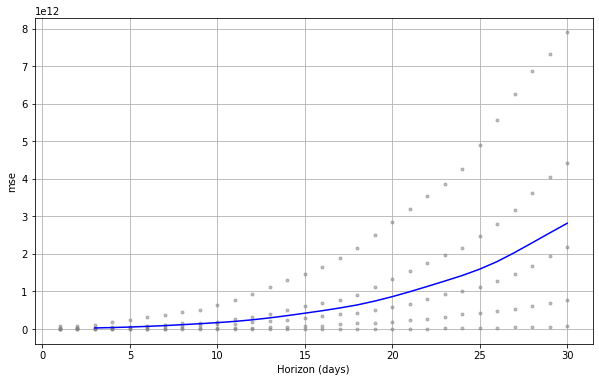

In [43]:
df_performance=plot_cross_validation_metric(df_cv,metric='mse')

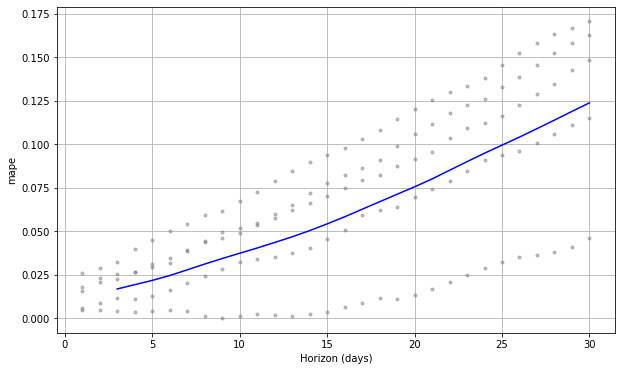

In [44]:
df_performance=plot_cross_validation_metric(df_cv,metric='mape')